# *Import library*
Meng-import library yang akan dipakai sehingga perlu dilakukan import terlebih dahulu



Fungsi masing-masing library,
- Scikit-Learn: Library untuk machine learning,
- Matplotlib: Library untuk melakukan visualisasi data,
- Numpy: Library untuk melakukan operasi matriks,
- Pandas: Library untuk memanipulasi data,
- Seaborn: Library untuk membuat grafis statistik


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# *Read Dataset*
Membaca dataset, mengganti kolom untuk mempermudah, dan menampilkan 10 data pertama

In [2]:
df= pd.read_csv('/Volumes/Macintosh HDD/MATKUL STT/Semester 6/Data Mining/camera_dataset.csv')

# METODE CRISP-DM

#  1.BUSINESS UNDERSTANDING

Tahap Business Understanding pada proyek ini bertujuan untuk memahami masalah bisnis, yaitu bagaimana meningkatkan akurasi estimasi harga kamera agar dapat memberikan informasi yang lebih akurat bagi pelanggan dan membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# 2.DATA UNDERSTANDING

Konteks:
Mendeskripsikan 1.038 kamera 13 properti

Isi:
Menjelaskan tipe data untuk setiap kolom 

13 Properti dari setiap kamera:
- Model: nama kamera
- Release date:tahun pembuatan
- Max_Resolution : esolution:pengukuran jumlah piksel -- elemen gambar atau titik warna individual -- yang dapat dimuat di layar tampilan atau di sensor kamera resolution,
- Effective pixels: piksel yang menangkap data gambar.
- Zoom wide (W): Ini adalah keadaan zoom minimum untuk kamera. Dengan panjang fokus yang lebih rendah, kamera menangkap bidikan terluas.
- Zoom tele (T): Tele artinya jauh. Jadi, saat Anda mencoba memotret objek yang jauh, Anda memperbesar lensa dengan memutar sakelar ke arah tele. T mewakili keadaan zoom lengkap. Anda dapat memotret objek yang jauh dan panjang fokus Anda akan maksimal pada kondisi ini.
- Normal focus range: Panjang fokus standar berkisar dari 35mm hingga 50mm tergantung pada jenis sensor kamera
- Macro focus range: Lensa makro adalah jenis lensa kamera khusus yang memiliki kemampuan bekerja dengan jarak pemfokusan yang sangat pendek, mengambil gambar yang tajam dari subjek yang sangat kecil. Lensa makro sejati memiliki rasio perbesaran 1:1 (atau lebih besar), dan jarak fokus minimum sekitar 30cm.
- Storage included : memory
- Weight (inc. batteries) : berat battery
- Dimensions
- Price

# *Deskripsi Dataset*

In [3]:
df.head(10) #Menampilkan 10 data teratas

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
5,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
6,Agfa ePhoto CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0
7,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0
8,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0
9,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0


# 3.DATA PREPARATION

# *a.Mengecheck data awal*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


/var/folders/vr/jgz1kp957vb_jnmt0sfbxhb40000gn/T/ipykernel_1309/2392647989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr(method='pearson')


<Axes: >

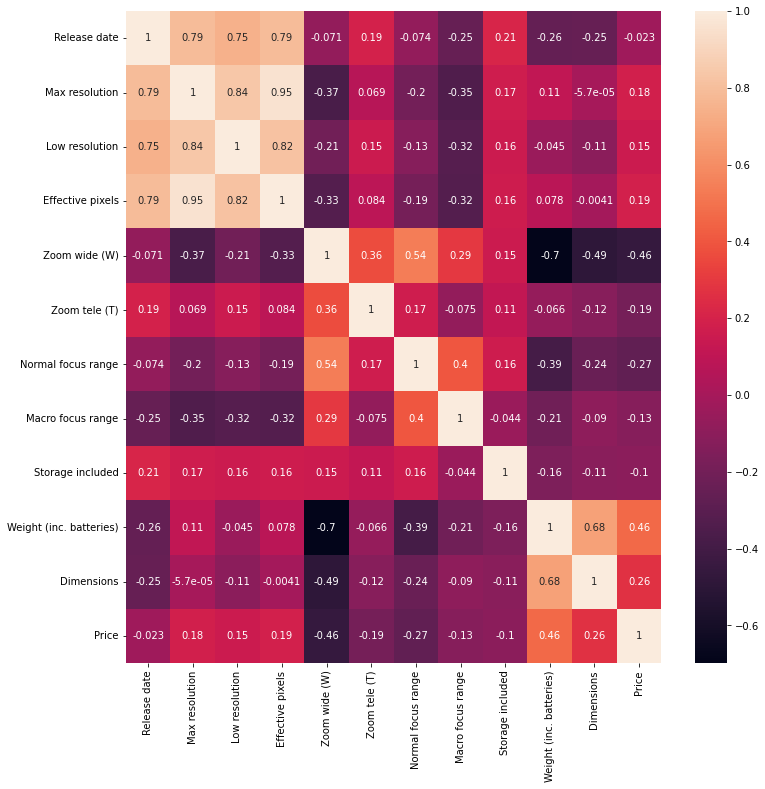

In [5]:
df_corr=df.corr(method='pearson')
plt.subplots(figsize=(12,12))
sns.heatmap(df_corr,annot=True)

In [6]:
df.isna().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

# *b.Data missing dan data inkonsistensi*

<Axes: >

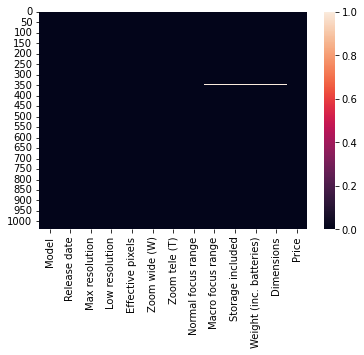

In [7]:
sns.heatmap(df.isnull())

# *Handling Data Missing*
- Mencari terlebih dahulu kolom yang memiliki data null
- Mereplace kolom yang memiliki data kosong dengan rata-rata dari kolom tersebut (mean imputation)
'''

In [8]:
df['Macro focus range'].fillna(df['Macro focus range'].mean(), inplace=True) #Mengisi data yang kosong di kolom tsb dengan rata-rata dari kolom tsb
df['Storage included'].fillna(df['Storage included'].mean(), inplace=True) #Mengisi data yang kosong di kolom tsb dengan rata-rata dari kolom tsb
df['Weight (inc. batteries)'].fillna(df['Weight (inc. batteries)'].mean(), inplace=True) #Mengisi data yang kosong di kolom tsb dengan rata-rata dari kolom tsb
df['Dimensions'].fillna(df['Dimensions'].mean(), inplace=True) #Mengisi data yang kosong di kolom tsb dengan rata-rata dari kolom tsb

print(df.isnull().sum()) #Menampilkan jumlah data null pada suatu kolom

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64


# *Data OK*

<Axes: >

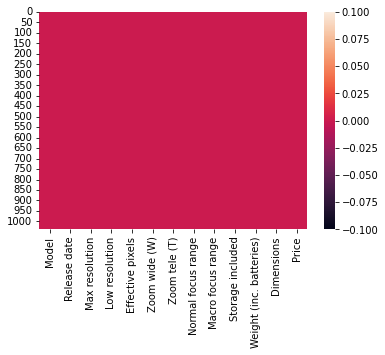

In [9]:
sns.heatmap(df.isnull())

# *Visualisasi Data*

# *a.Jumlah Kamera Berdasarkan Model*


In [10]:
models = df.groupby('Model').count()[['Storage included']].sort_values(by='Storage included',ascending=True).reset_index()
models = models.rename(columns={'Storage included':'numberOfCamera'})

(array([   0,    1,    2, ..., 1035, 1036, 1037]),
 [Text(0, 0, 'Agfa ePhoto 1280'),
  Text(1, 0, 'Olympus Stylus 800 '),
  Text(2, 0, 'Olympus Stylus 810 '),
  Text(3, 0, 'Olympus Stylus 820'),
  Text(4, 0, 'Olympus Stylus 830'),
  Text(5, 0, 'Olympus Stylus Verve '),
  Text(6, 0, 'Olympus Stylus Verve  S'),
  Text(7, 0, 'Panasonic Lumix DMC-F7'),
  Text(8, 0, 'Panasonic Lumix DMC-FX01'),
  Text(9, 0, 'Panasonic Lumix DMC-FX07'),
  Text(10, 0, 'Panasonic Lumix DMC-FX1'),
  Text(11, 0, 'Panasonic Lumix DMC-FX10'),
  Text(12, 0, 'Panasonic Lumix DMC-FX100'),
  Text(13, 0, 'Panasonic Lumix DMC-FX12'),
  Text(14, 0, 'Olympus Stylus 790 SW'),
  Text(15, 0, 'Panasonic Lumix DMC-FX2'),
  Text(16, 0, 'Panasonic Lumix DMC-FX30'),
  Text(17, 0, 'Panasonic Lumix DMC-FX33'),
  Text(18, 0, 'Panasonic Lumix DMC-FX5'),
  Text(19, 0, 'Panasonic Lumix DMC-FX50'),
  Text(20, 0, 'Panasonic Lumix DMC-FX55'),
  Text(21, 0, 'Panasonic Lumix DMC-FX7'),
  Text(22, 0, 'Panasonic Lumix DMC-FX8'),
  Text(23, 0,

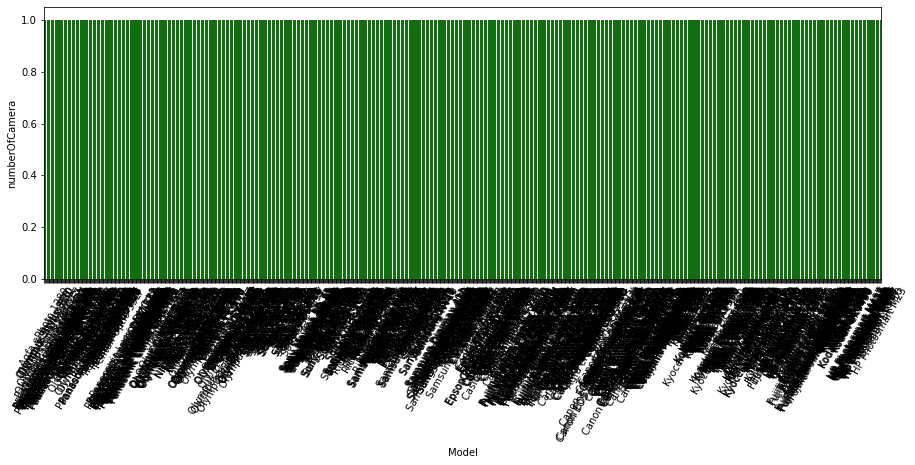

In [11]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Model'],y=models['numberOfCamera'],color='green')
plt.xticks(rotation=60)

# *b.Distribusi harga kamera*

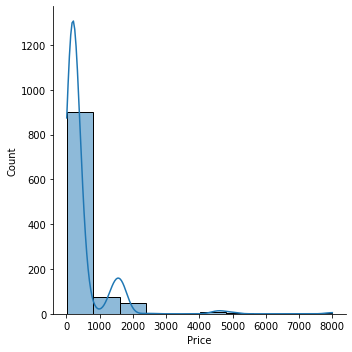

In [12]:
sns.displot(df['Price'], bins=10, kde=True) #Bentuk visualisasi histogram
plt.show() #Menampilkan visualisasi


# *Distribusi Berat Battery*

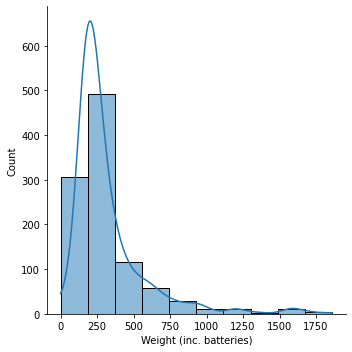

In [13]:
sns.displot(df['Weight (inc. batteries)'], bins=10, kde=True) #Bentuk visualisasi histogram
plt.show() #Menampilkan visualisasi

# 4.MODELING DATA
# *a.Seleksi fitur*

In [14]:
features = ['Release date','Max resolution','Storage included','Weight (inc. batteries)','Dimensions']
x = df[features]
y = df['Price']
x.shape, y.shape

((1038, 5), (1038,))

# *b.Split data training dan data testing*

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10)
y_test.shape

(260,)

# *c.Membuat model Regresi Linear*

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

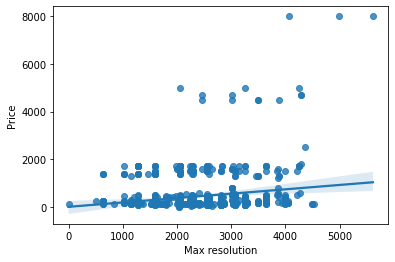

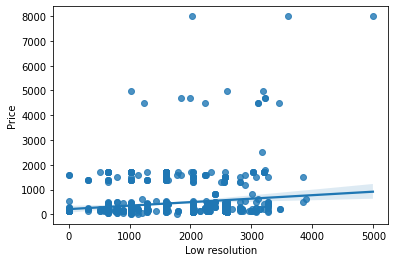

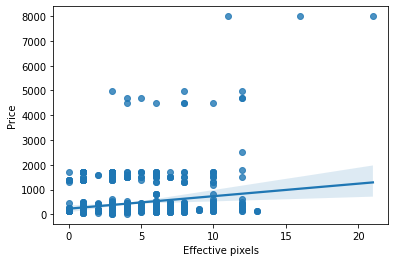

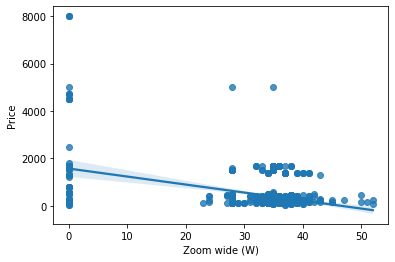

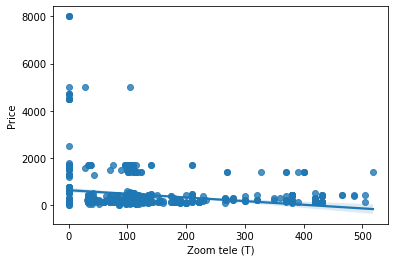

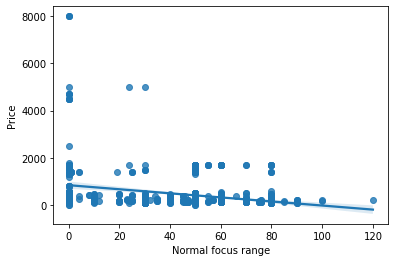

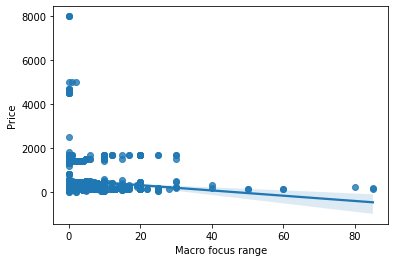

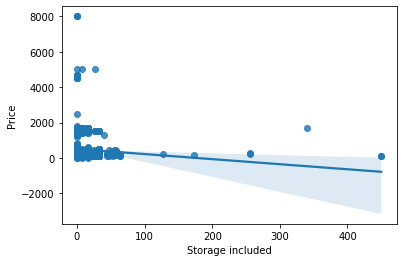

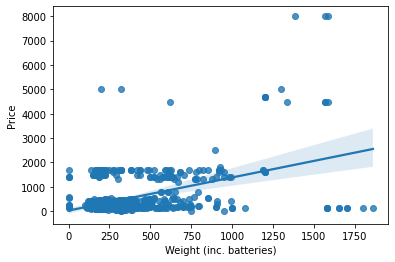

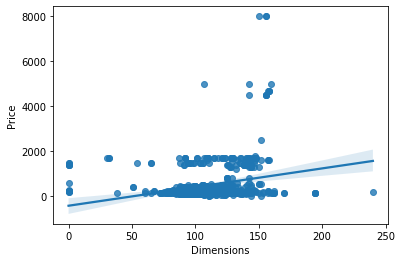

In [17]:
for features in df:
    if features in ['Model','Release date','Price']:
        continue
    
    sns.regplot(y=df['Price'],x=df[features])
    plt.show()

# 5.EVALUATION DATA

In [19]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.2848589133206997


In [20]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


 # *Membuat Inputan Model Regresi Linear*

In [25]:
input_data = np.array([[2001,640.0,4.0,420.0,95.0]])

prediction = lr.predict(input_data)
print('Estimasi Harga Kamera dengan Properti tersebut adalah : $', prediction)

Estimasi Harga Kamera dengan Properti tersebut adalah : $ [249.31868741]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 6.DEPLOYMENT

# *a.Save model*

In [26]:
import pickle

filename = 'estimasi_harga_camera.sav'
pickle.dump(lr,open(filename,'wb'))

# b.Link to Estimation App in Streamlit Share

https://aprastian11-estimasi-harga-kamera-estimasi-camera-5ju0w7.streamlit.app/

# c.Link of Dataset
https://www.kaggle.com/datasets/crawford/1000-cameras-dataset/code